In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Data Preparation
# Update these paths to match your directory structure
train_dir = r"C:\\Users\\Pavan.M\\Downloads\\archive (6)\\train"
val_dir = r"C:\\Users\\Pavan.M\\Downloads\\archive (6)\\test"

In [4]:
def check_directory_structure(directory):
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory not found: {directory}")
    
    contents = os.listdir(directory)
    print(f"Contents of {directory}:")
    for item in contents:
        print(f"- {item}")
    
    if 'cat' not in contents or 'dog' not in contents:
        print(f"Warning: 'cat' and 'dog' subdirectories not found in {directory}")
        print("Using all subdirectories as class names.")
        return contents
    else:
        return ['cat', 'dog']

In [5]:
# Check and print directory structures
print("Checking directory structures...")
train_classes = check_directory_structure(train_dir)
val_classes = check_directory_structure(val_dir)

Checking directory structures...
Contents of C:\\Users\\Pavan.M\\Downloads\\archive (6)\\train:
- cats
- dogs
Using all subdirectories as class names.
Contents of C:\\Users\\Pavan.M\\Downloads\\archive (6)\\test:
- cats
- dogs
Using all subdirectories as class names.


In [6]:
# Set up data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
print("Creating data generators...")

Creating data generators...


In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary' if len(train_classes) == 2 else 'categorical',
    classes=train_classes
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary' if len(val_classes) == 2 else 'categorical',
    classes=val_classes
)

print(f"Found {len(train_generator.filenames)} images in the training set.")
print(f"Found {len(validation_generator.filenames)} images in the validation set.")

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 557 images in the training set.
Found 140 images in the validation set.


In [9]:
# Model Creation
num_classes = len(train_classes)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1 if num_classes == 2 else num_classes, activation='sigmoid' if num_classes == 2 else 'softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy' if num_classes == 2 else 'categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Pavan.M\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
num_classes

2

In [22]:
model

<Sequential name=sequential, built=True>

In [10]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/20


C:\Users\Pavan.M\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 18/100 ━━━━━━━━━━━━━━━━━━━━ 51s 623ms/step - accuracy: 0.4238 - loss: 1.1975

C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.4487 - loss: 0.9626 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.4865 - loss: 0.6948 - val_accuracy: 0.5071 - val_loss: 0.6930
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5071 - val_loss: 0.6928
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.5133 - loss: 0.6931 - val_accuracy: 0.4786 - val_loss: 0.6922
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.5209 - loss: 0.6929 - val_accuracy: 0.5857 - val_loss: 0.6918
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.5436 - loss: 0.6910 - val_accuracy: 0.5214 - val_loss: 0.6893
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - accuracy: 0.5310 - loss: 0.6886 - val_accuracy: 0.5214 - val_loss: 0.6872
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.5448 - loss: 0.6885 - val

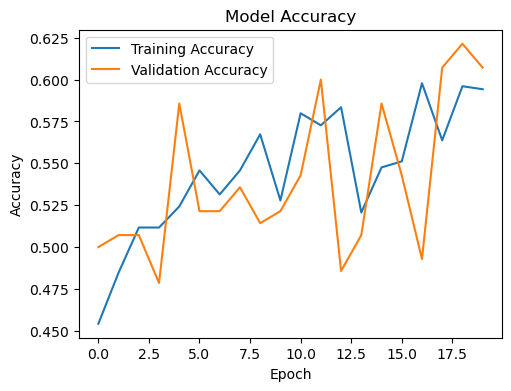

In [12]:
# Plotting training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


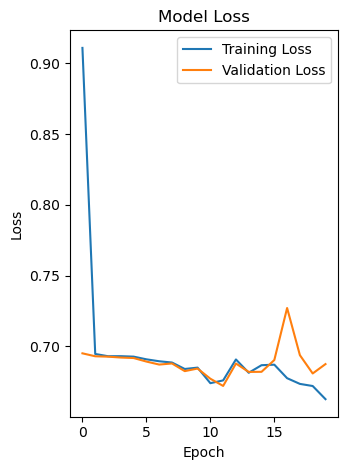

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Model Evaluation
test_loss, test_acc = model.evaluate(validation_generator, steps=50)
print(f'Test accuracy: {test_acc:.3f}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6036 - loss: 0.6876  
Test accuracy: 0.607


In [15]:
# Predictions
predictions = model.predict(validation_generator, steps=50)
if num_classes == 2:
    predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
else:
    predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes[:len(predicted_classes)]

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step  


In [16]:
predictions

array([[0.42836267],
       [0.66235816],
       [0.49695006],
       [0.22088867],
       [0.5310161 ],
       [0.6194957 ],
       [0.6674887 ],
       [0.51068217],
       [0.78493774],
       [0.51887536],
       [0.48091686],
       [0.6066634 ],
       [0.50441843],
       [0.4496872 ],
       [0.33873412],
       [0.13707139],
       [0.49350232],
       [0.49497557],
       [0.53423774],
       [0.6517347 ],
       [0.49687257],
       [0.50682545],
       [0.5006386 ],
       [0.49551618],
       [0.47960788],
       [0.50784457],
       [0.5366378 ],
       [0.7424693 ],
       [0.53305113],
       [0.3450813 ],
       [0.59094596],
       [0.49494037],
       [0.2617364 ],
       [0.28156763],
       [0.3469559 ],
       [0.49545038],
       [0.5945922 ],
       [0.46007884],
       [0.5712997 ],
       [0.48602325],
       [0.5248994 ],
       [0.6571554 ],
       [0.49632695],
       [0.6461266 ],
       [0.5262984 ],
       [0.69662106],
       [0.51143366],
       [0.476

In [17]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# Classification Report
target_names = train_classes if len(train_classes) == 2 else validation_generator.class_indices.keys()
print(classification_report(true_classes, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

        cats       0.55      0.41      0.47        70
        dogs       0.53      0.66      0.59        70

    accuracy                           0.54       140
   macro avg       0.54      0.54      0.53       140
weighted avg       0.54      0.54      0.53       140



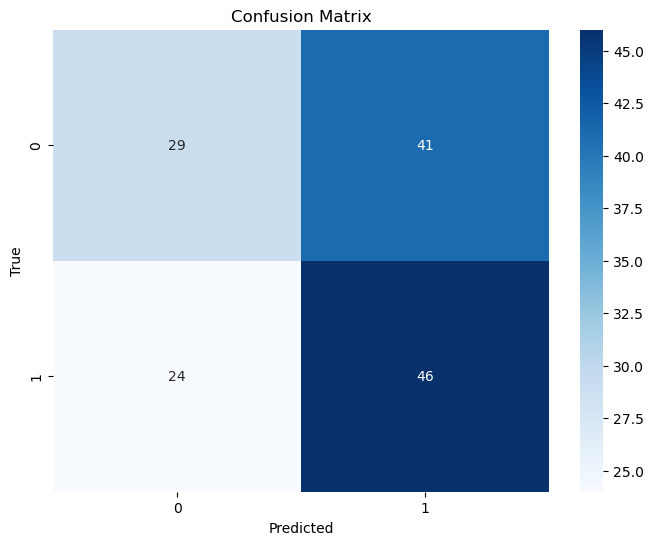

In [19]:
# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


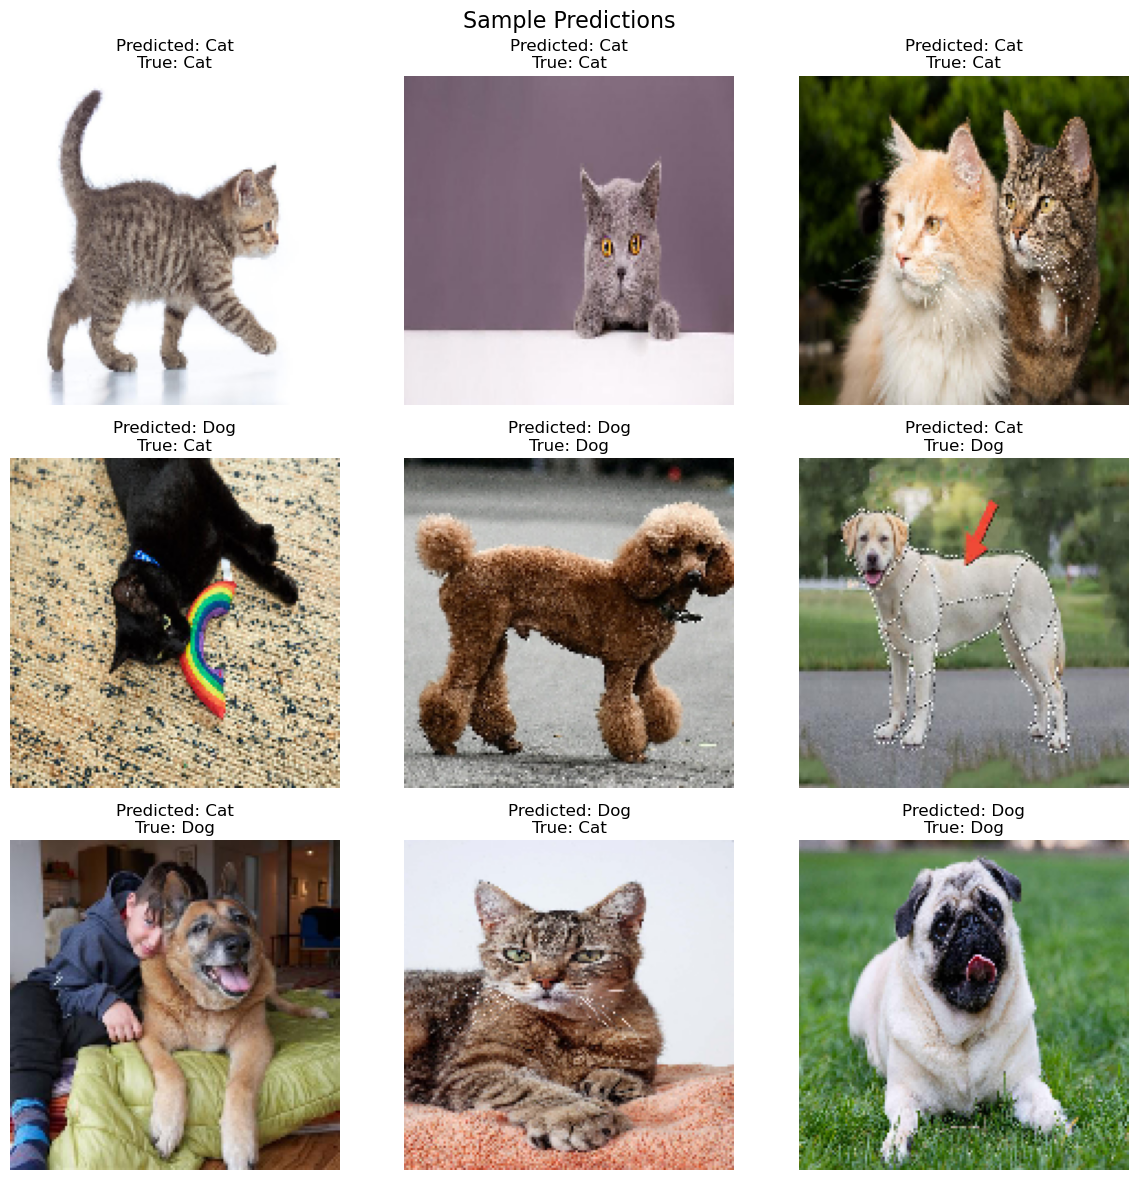

In [20]:
# Sample predictions
sample_images, sample_labels = next(validation_generator)
sample_predictions = model.predict(sample_images)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Sample Predictions', fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < len(sample_images):
        ax.imshow(sample_images[i])
        if num_classes == 2:
            predicted_label = 'Dog' if sample_predictions[i] > 0.5 else 'Cat'
            true_label = 'Dog' if sample_labels[i] == 1 else 'Cat'
        else:
            predicted_label = target_names[np.argmax(sample_predictions[i])]
            true_label = target_names[np.argmax(sample_labels[i])]
        ax.set_title(f'Predicted: {predicted_label}\nTrue: {true_label}')
        ax.axis('off')

plt.tight_layout()
plt.show()